# Forecasting | Brent Crude Oil

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('brent.csv')

In [5]:
df.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [6]:
df.shape

(9524, 2)

In [7]:
df.rename(columns={'DATE' : 'date','DCOILBRENTEU':'price'},inplace=True)

In [8]:
df.tail()

,date,price
9519,2023-11-14,84.2
9520,2023-11-15,82.4
9521,2023-11-16,77.73
9522,2023-11-17,81.22
9523,2023-11-20,83.25


In [9]:
df.set_index('date',inplace=True)

In [10]:
df.head()

,price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9524 entries, 1987-05-20 to 2023-11-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   9524 non-null   object
dtypes: object(1)
memory usage: 148.8+ KB


In [13]:
df.isnull().sum()

price    0
dtype: int64

In [14]:
df['price'] = df['price'].replace('.', method='pad')
df['price'] = df['price'].replace('NaN', method='pad') # replace missing values with previous value

In [15]:
df['price']=df['price'].astype('float')

In [16]:
df.to_csv('brentoil.csv')

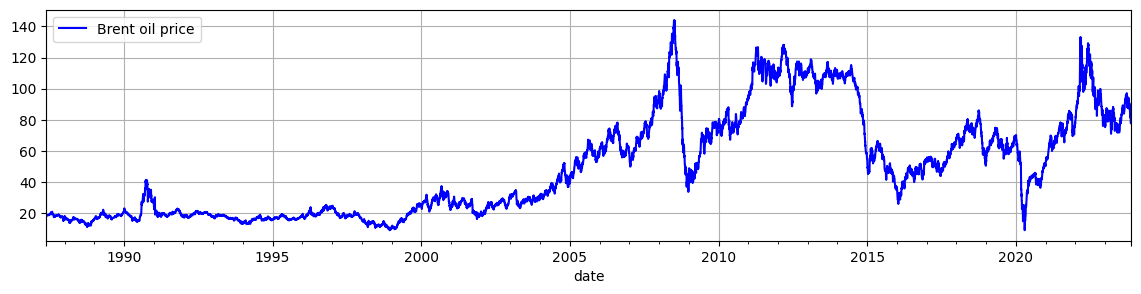

In [17]:
import seaborn as sns
df.price.plot(figsize=(14,3),color='blue',label='Brent oil price')
plt.legend()
plt.grid()

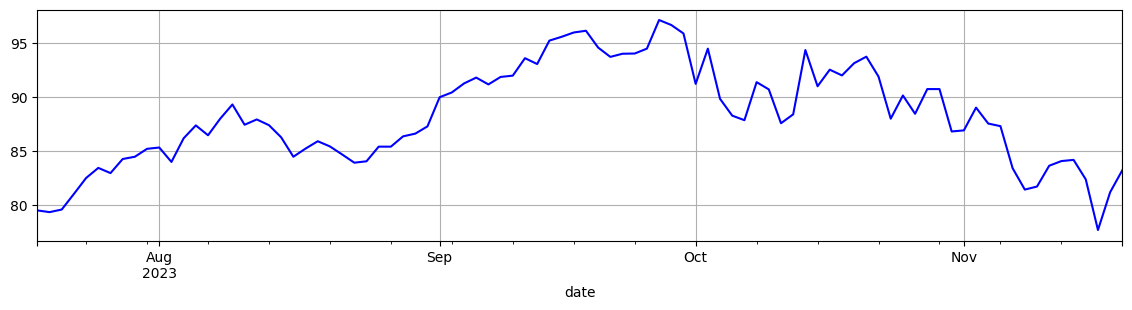

In [18]:
import seaborn as sns
df.price[-90:].plot(figsize=(14,3),color='blue')
plt.grid()

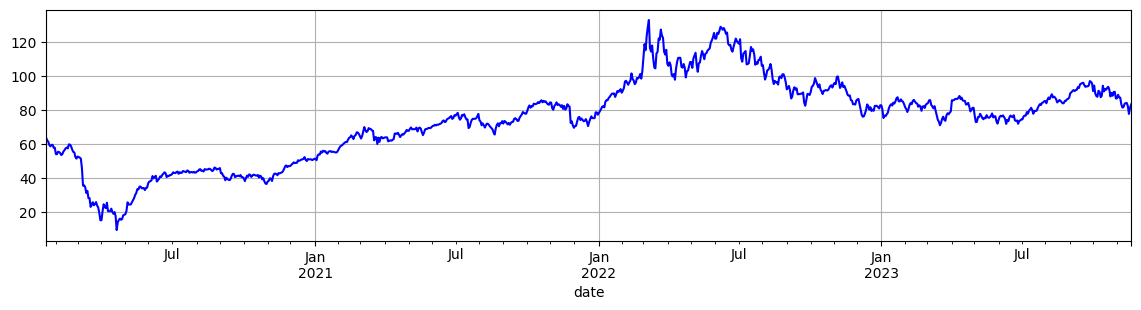

In [19]:
df.price[-1000:].plot(figsize=(14,3),color='blue')
plt.grid()

### Distribution of Brent oil price

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


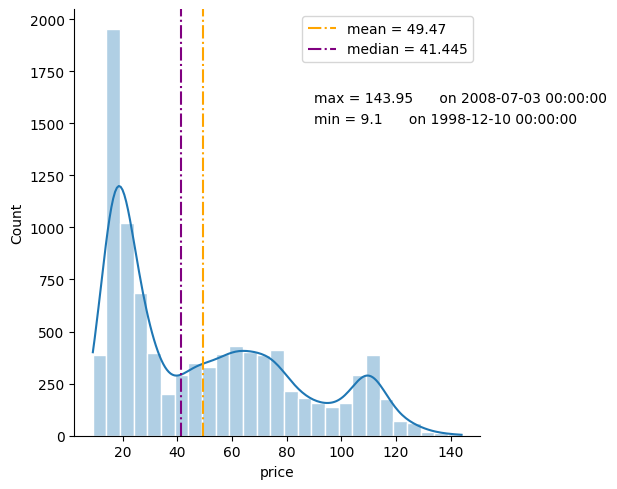

In [20]:
sns.displot(df['price'],kde='True',alpha=0.35,edgecolor='white')
plt.axvline(df['price'].mean(),ls='-.',color='orange',label=f'mean = {np.round(df.price.mean(),2)}')
plt.axvline(df['price'].median(),ls='-.',color='purple',label=f'median = {df.price.median()}')
plt.text(90,1500,f'min = {df.price.min()}      on {df.price.idxmin()}')
plt.text(90,1600,f'max = {df.price.max()}      on {df.price.idxmax()}')
plt.legend()

In [21]:
df.price.idxmax()


Timestamp('2008-07-03 00:00:00')

1.Right skewed  
2.Almost 2000 days brent price was around 20  
3.More often price was in between 30-110

In [22]:
df1 = pd.read_csv('brent.csv')

In [23]:
df1.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [24]:
df1.rename(columns={'DATE' : 'date','DCOILBRENTEU':'price'},inplace=True)


In [25]:
df1.columns

Index(['date', 'price'], dtype='object')

In [26]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

df1['Month'] = df1['date'].dt.strftime('%b')
df1['Year'] = df1['date'].dt.strftime('%Y')
df1.head()

,date,price,Month,Year
0,1987-05-20,18.63,May,1987
1,1987-05-21,18.45,May,1987
2,1987-05-22,18.55,May,1987
3,1987-05-25,18.60,May,1987
4,1987-05-26,18.63,May,1987


In [27]:
df1['price'] = df1['price'].replace('.', method='pad') # replace missing values with previous value

In [28]:
df1['price']=df1['price'].astype('float')

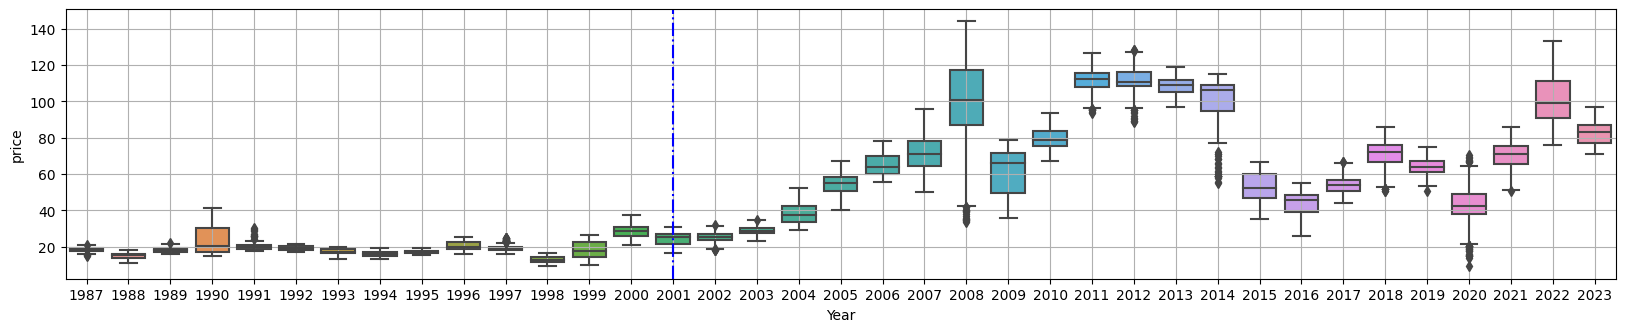

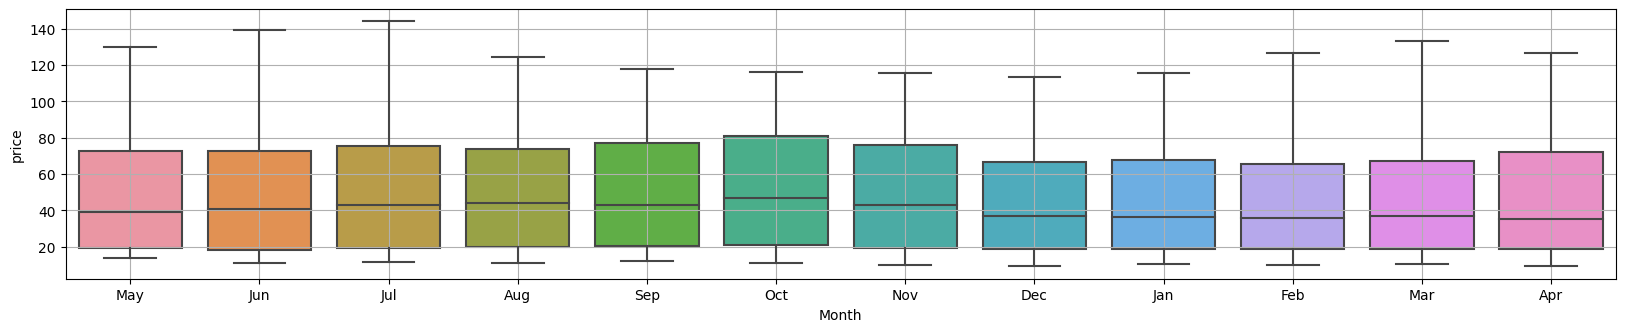

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3.5))
sns.boxplot(x=df1.Year,y=df1.price)
plt.grid()
plt.axvline(x=14,ls='-.',c='b')
plt.figure(figsize=(20,3.5))
sns.boxplot(x=df1.Month,y=df1.price)
plt.grid()

### Observations  


1.Drop in oil price in 2008 from 140+ to around 40--> Financial crisis and Great recession 


2.Drop in oil prices in 2014-2016 --> lower demand for oil in Europe and China, steady supply of oil from OPEC ,Reduced geopolitical concerns https://www.opec.org/opec_web/en/about_us/25.htm  


3.Drop in 2020 --> to the COVID-19 pandemic.--> Governments closed businesses and restricted travel. oversupply of oil.  


4.2022--> rise in oil price-->Russia Ukarian war, tensions in middle east, OPEC regulations  

5.1990-->Iraq's invasion of Kuwait/Cold winter  

6.Volatile in Marcch an July --> Transition of season


### Decomposition

In [30]:
# pip install --upgrade statsmodels

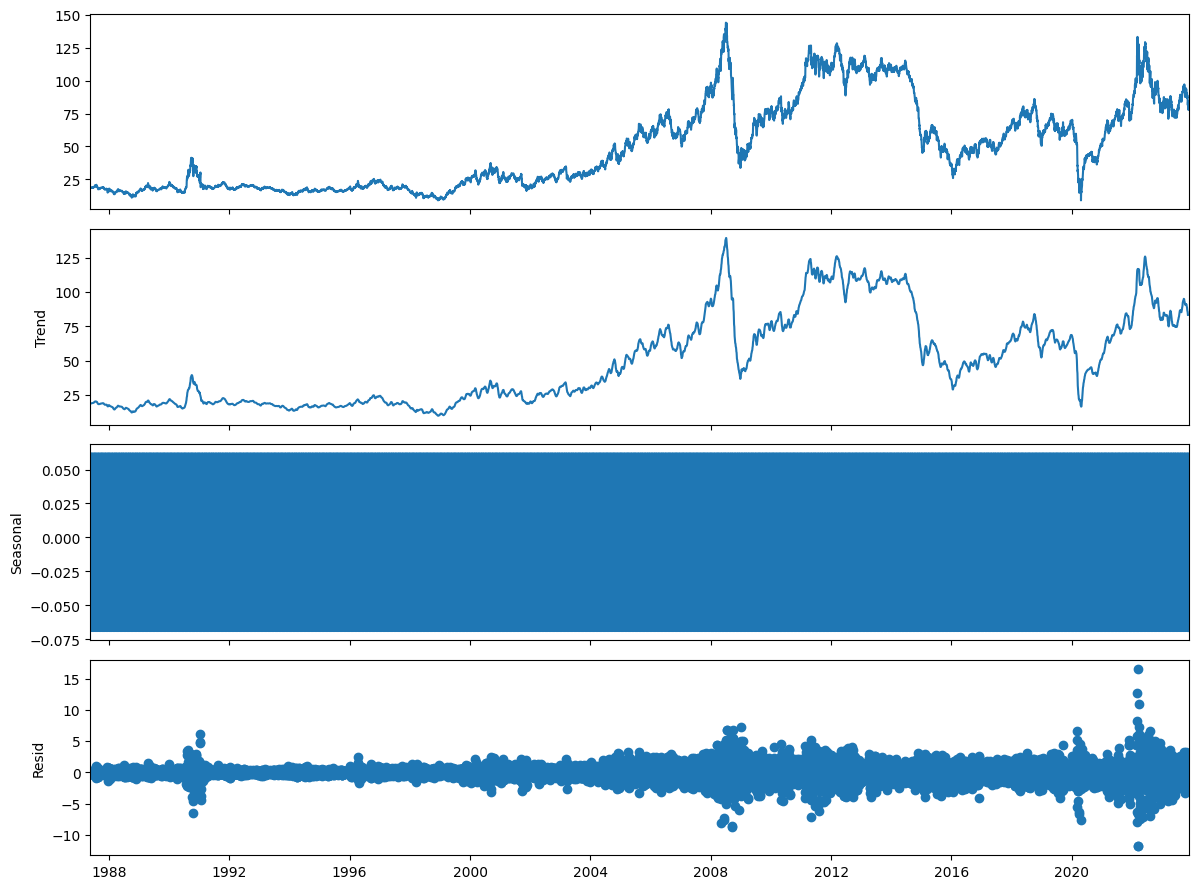

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_decompose_add=seasonal_decompose(df,period=12,model='Additive')
plt.rc('figure',figsize=(12,9))
df_decompose_add.plot()
plt.show()

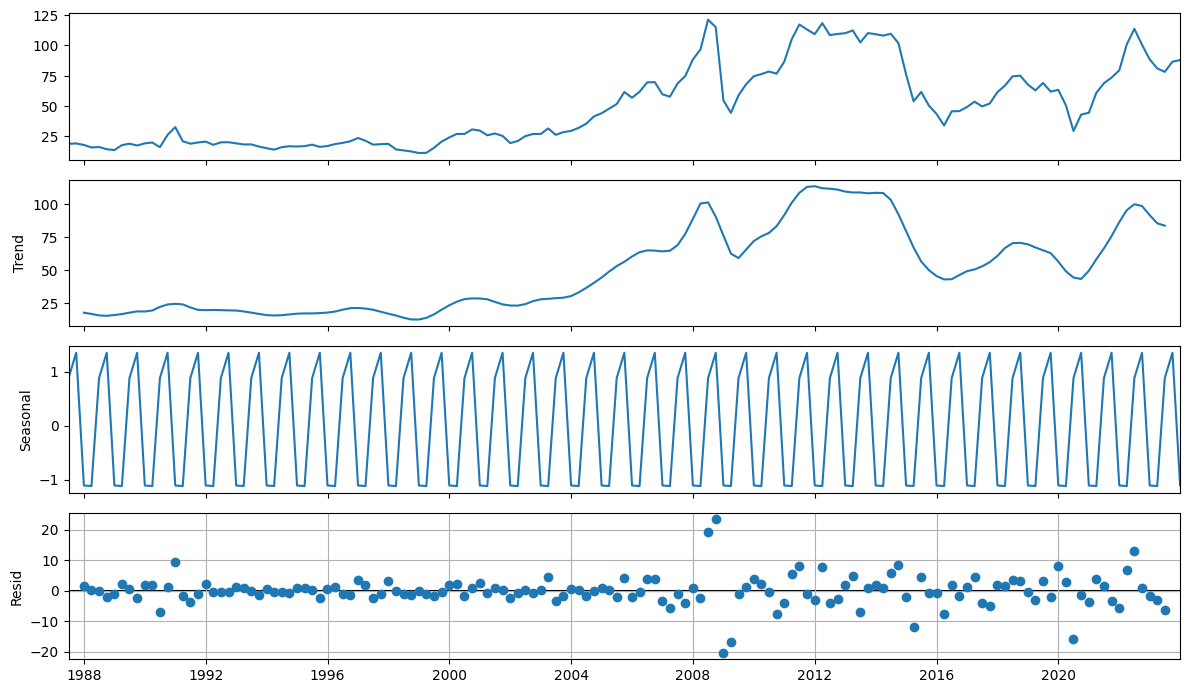

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_resampled = df.resample('Q').mean().ffill()
df_resampled.index.freq = 'Q'
df_decompose_add=seasonal_decompose(df_resampled,model='additive')
plt.rc('figure',figsize=(12,7))
df_decompose_add.plot()
plt.grid()
plt.show()


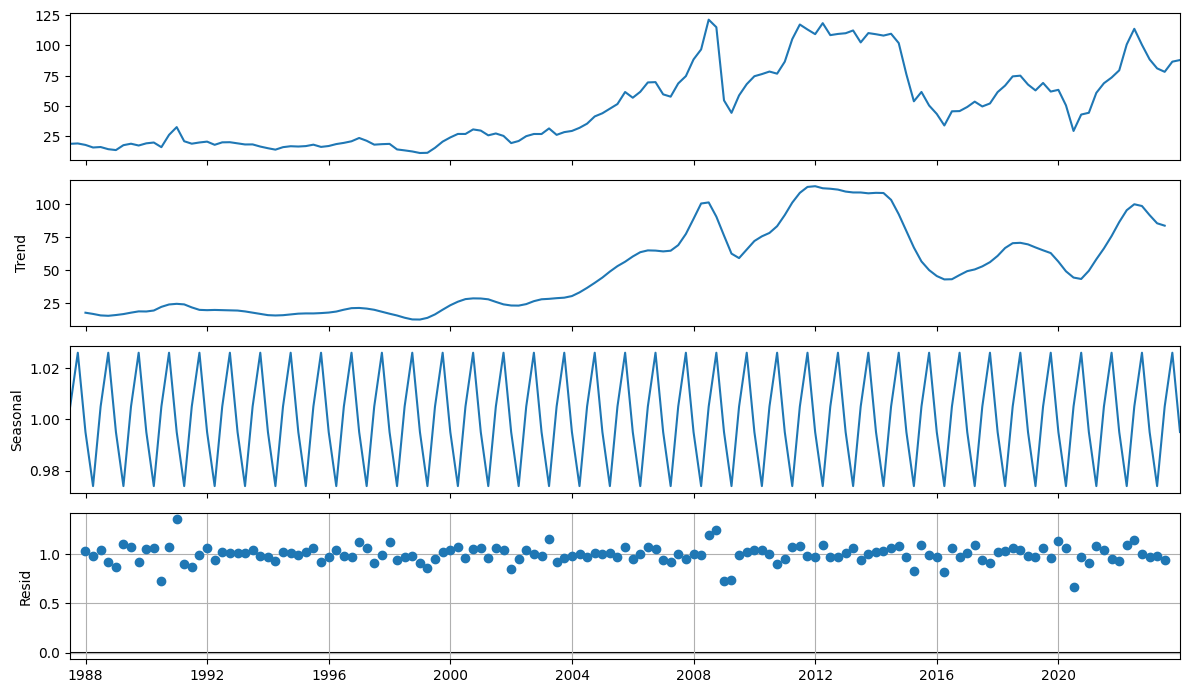

In [33]:
df_decompose_mul=seasonal_decompose(df_resampled,model='multiplicative')
plt.rc('figure',figsize=(12,7))
df_decompose_mul.plot()
plt.grid()
plt.show()

In [34]:
df_decompose_mul.seasonal

date
1987-06-30    1.004993
1987-09-30    1.025933
1987-12-31    0.995055
1988-03-31    0.974018
1988-06-30    1.004993
                ...   
2022-12-31    0.995055
2023-03-31    0.974018
2023-06-30    1.004993
2023-09-30    1.025933
2023-12-31    0.995055
Freq: Q-DEC, Name: seasonal, Length: 147, dtype: float64

In [35]:
tsa_plots.plot_acf(df_decompose_mul.seasonal,lags=10)
tsa_plots.plot_pacf(df_decompose_mul.seasonal,lags=10)
plt.show()

NameError: name 'tsa_plots' is not defined

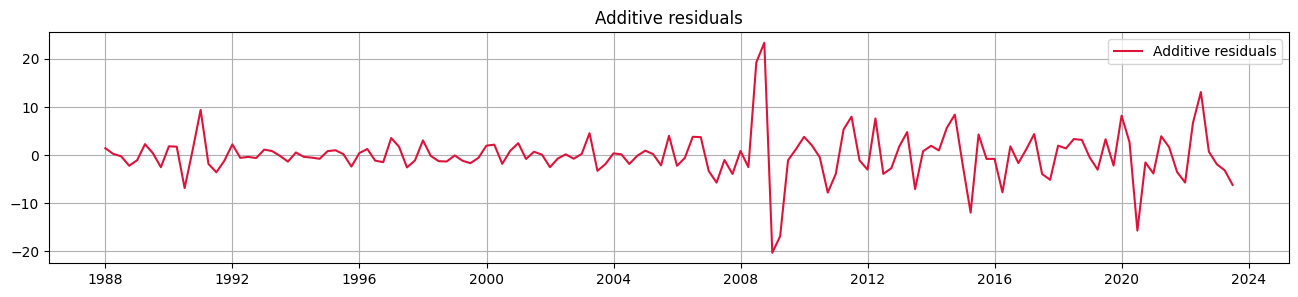

In [36]:
plt.subplots(figsize=(16,3))
plt.plot(df_decompose_add.resid,label='Additive residuals',c ='crimson',)
plt.title('Additive residuals')
plt.legend()
plt.grid()

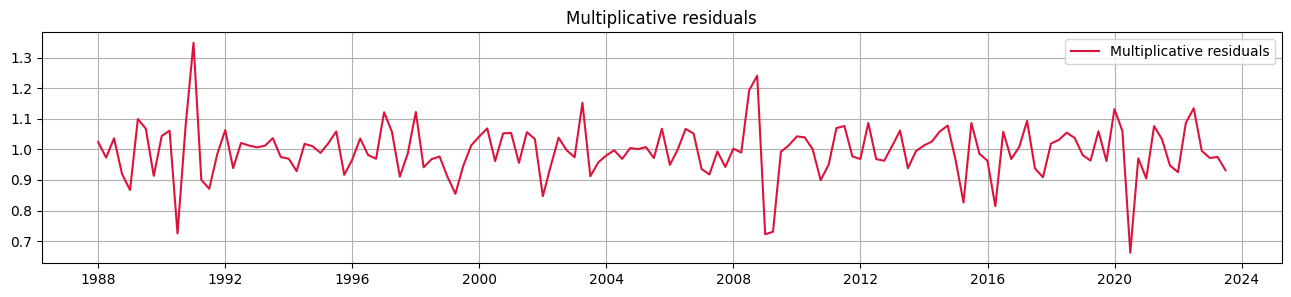

In [37]:
plt.subplots(figsize=(16,3))
plt.plot(df_decompose_mul.resid,label='Multiplicative residuals',c ='crimson')
plt.title('Multiplicative residuals')
plt.legend()
plt.grid()

Non-constant trend : Mean of the series is changing over time  

Heterosedastic  

Anomaolous

### durbin_watson test

In [ ]:
from statsmodels.stats.stattools import durbin_watson
dw_statistic1 = durbin_watson(df_decompose_add.resid.dropna())
dw_statistic2 = durbin_watson(df_decompose_mul.resid.dropna())

dw_statistic1 ,dw_statistic2 # <2: positive >2: negative  range:0-4

Positive Autocorrelation : Additional patterns exists

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# adf_test1 = adfuller(df_decompose_add.resid)
# print(f'p-value: {adf_test1[1]}')

In [ ]:
df.loc['1987-06-30']

### ACF and PACF

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots

plt.rc('figure',figsize=(12,3))
tsa_plots.plot_acf(df.price,lags=100)
tsa_plots.plot_acf(df.price,lags=9500)
plt.show()


Slow decay : Non stationary (Exponential decay: MA process)  

No peaks : No seasonality


In [ ]:
tsa_plots.plot_pacf(df.price,lags=100)
tsa_plots.plot_pacf(df.price,lags=1000)
# tsa_plots.plot_pacf(df.price,lags=4750)
plt.show()

Seasonal autoregression (P)  


Seasonal period :100 : Short term

### Moving Average

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.price[9400:],label='Original',ls='-.')
for i in [2,7,10,12]:
    plt.plot(df.price[9400:].rolling(i).mean(), label=str(i))
   
plt.grid()   
plt.legend(loc='best')

In [ ]:
data = pd.read_csv('brentoil.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
df_resampled

### Check for Stationarity | Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df)
print(f'p-value: {adf_test[1]}')

In [ ]:
df_diff = df.diff().dropna() # 1st order differentiation
adf_test1 = adfuller(df_diff)
print(f'p-value: {adf_test1[1]}')

In [ ]:
df_diff.to_csv('dataDiff.csv')

In [ ]:
plt.plot(df_diff)

In [ ]:
plt.plot(df_diff[-280:],c='crimson')

d=1

--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
'''Split the data'''
split = int(.85 *df.shape[0])
dfTrain = df[:split]
dfTest = df[split:]


In [ ]:
len(dfTrain), len(dfTest)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(dfTrain,order=(2,1,2)).fit()
pred_ARIMA = model_ARIMA.forecast(1600)

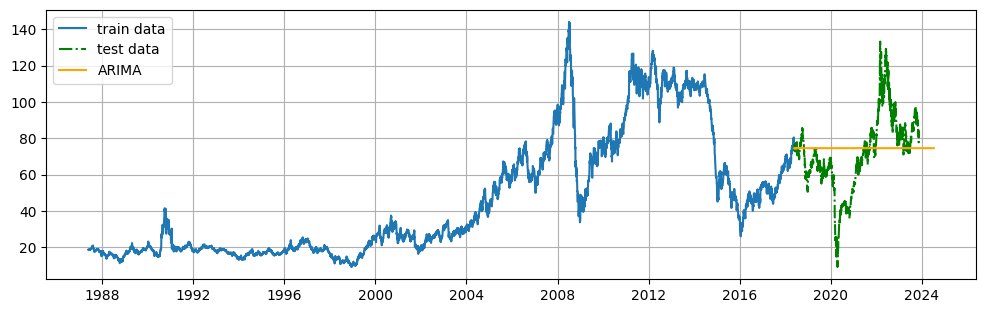

In [356]:
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(dfTrain,label='train data')
plt.plot(dfTest,label='test data', c='g',ls='-.')
plt.plot(pred_ARIMA,label='ARIMA',c='orange')
plt.legend()


### ARIMA-GARCH

In [38]:
from statsmodels.tsa.arima.model import ARIMA
modelARIMA = ARIMA(df,order=(1,1,9)).fit()
'''ARIMA forecast'''
forecastARIMA = modelARIMA.forecast(30) 

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [276]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [39]:
import pickle
with open('modelARIMA.pkl', 'wb') as f:
    pickle.dump(modelARIMA, f)

In [40]:
with open('modelARIMA.pkl', 'rb') as f:
    loadedARIMA = pickle.load(f)

In [41]:

forecastARIMA_L = loadedARIMA.forecast(30) 
forecastARIMA_L

2023-11-21    83.150579
2023-11-22    82.806551
2023-11-23    82.904946
2023-11-24    82.928736
2023-11-27    82.716015
2023-11-28    82.642309
2023-11-29    82.494923
2023-11-30    82.404024
2023-12-01    82.356137
2023-12-04    82.311321
2023-12-05    82.269380
2023-12-06    82.230130
2023-12-07    82.193397
2023-12-08    82.159020
2023-12-11    82.126849
2023-12-12    82.096741
2023-12-13    82.068565
2023-12-14    82.042196
2023-12-15    82.017518
2023-12-18    81.994424
2023-12-19    81.972811
2023-12-20    81.952584
2023-12-21    81.933655
2023-12-22    81.915940
2023-12-25    81.899361
2023-12-26    81.883846
2023-12-27    81.869326
2023-12-28    81.855738
2023-12-29    81.843021
2024-01-01    81.831120
Freq: B, Name: predicted_mean, dtype: float64

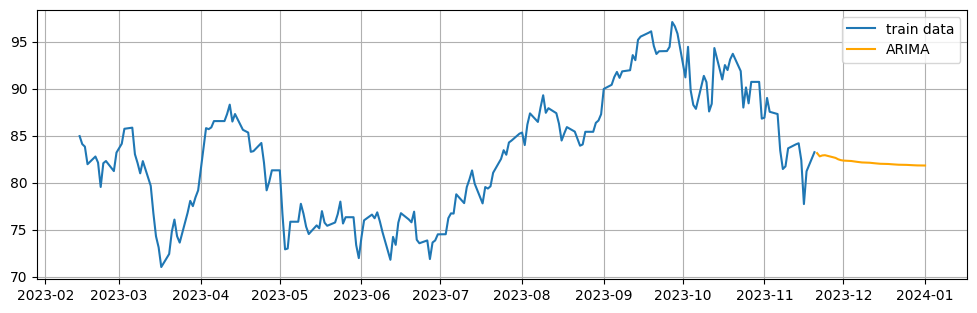

In [42]:
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(df[-200:],label='train data')
plt.plot(forecastARIMA,label='ARIMA',c='orange')
plt.legend()

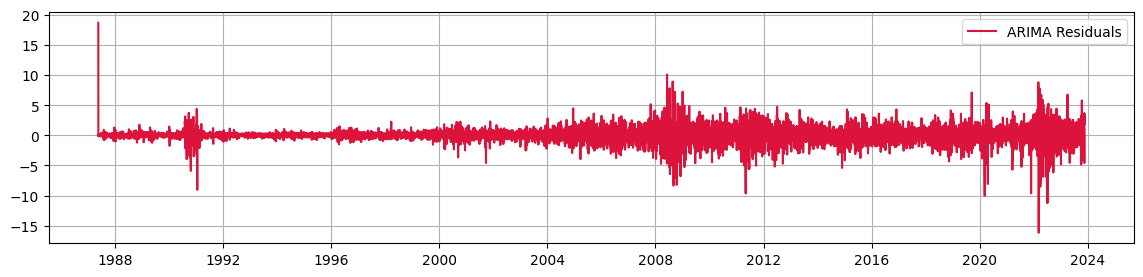

In [46]:
residArima = modelARIMA.resid
plt.figure(figsize=(14,3))
plt.plot(residArima,c='crimson', label = 'ARIMA Residuals')
plt.legend()
plt.grid()

In [47]:
tsa_plots.plot_acf(residArima,lags=10)
tsa_plots.plot_pacf(residArima,lags=10)
plt.show()

NameError: name 'tsa_plots' is not defined

In [48]:
# pip install arch

In [49]:
from random import gauss
gauss(2,1)

2.2321164459960516

In [50]:
import arch
modelGARCH = arch.arch_model(residArima,mean='Zero', vol='Garch', p=50, q=30)

In [51]:
resultGarch = modelGARCH.fit()
'''GARCH forecast'''
forecastGARCH = resultGarch.forecast(horizon=30)

Iteration:      1,   Func. Count:     83,   Neg. LLF: 105602.43474695693
Iteration:      2,   Func. Count:    166,   Neg. LLF: 17766.263421521504
Iteration:      3,   Func. Count:    249,   Neg. LLF: 587112.9777511957
Iteration:      4,   Func. Count:    332,   Neg. LLF: 1337909.3364426086
Iteration:      5,   Func. Count:    415,   Neg. LLF: 1192971.6524079286
Iteration:      6,   Func. Count:    498,   Neg. LLF: 949033.380600109
Iteration:      7,   Func. Count:    581,   Neg. LLF: 548950.0783940093
Iteration:      8,   Func. Count:    664,   Neg. LLF: 57998.67839676462
Iteration:      9,   Func. Count:    747,   Neg. LLF: 75434.73608628394
Iteration:     10,   Func. Count:    831,   Neg. LLF: 45397.910893725195
Iteration:     11,   Func. Count:    915,   Neg. LLF: 22029.57371988694
Iteration:     12,   Func. Count:    999,   Neg. LLF: 21742.659325754896
Iteration:     13,   Func. Count: 1.08e+03,   Neg. LLF: 77703.64238210271
Iteration:     14,   Func. Count: 1.17e+03,   Neg. LLF: 2

C:\Users\rakes\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [54]:
with open('resultGarch.pkl', 'wb') as f:
    pickle.dump(resultGarch, f)

In [56]:
with open('resultGarch.pkl', 'rb') as f:
    loadedGARCH = pickle.load(f)

In [61]:
forecastGARCHL = loadedGARCH.forecast(horizon=30)
forecastGARCHL.variance.values[-1,:]

array([6.43657725, 6.32660196, 6.78806816, 6.52628186, 5.59186364,
       6.1110038 , 6.48544361, 6.38261165, 5.78598033, 6.28902962,
       6.64985743, 6.4619811 , 5.91809735, 6.38738258, 6.61547901,
       5.82870801, 5.9420422 , 6.03116668, 6.39181444, 6.49953262,
       7.0622625 , 6.36639572, 6.30312105, 5.74874768, 5.69805356,
       6.3659574 , 6.67285673, 6.39774015, 5.94421718, 5.99568999])

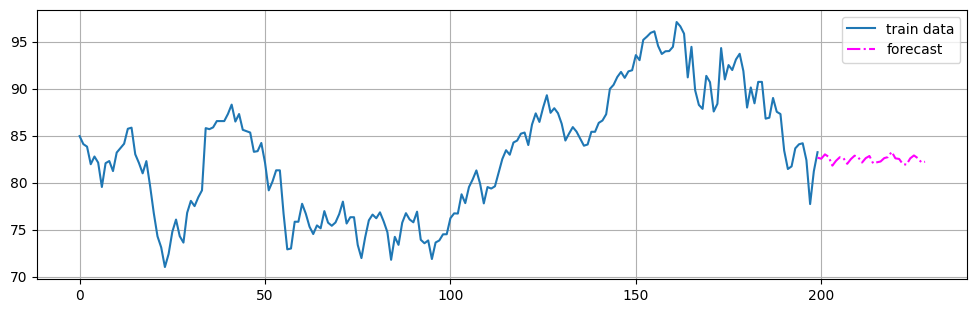

In [73]:
'''combined forecast'''
forecastBrent = forecastARIMA.mean() + forecastGARCH.variance.values[-1, :]-6

'''set up forecast dataframe'''
forecastIndex = pd.date_range(start='2023-11-20', periods=30, freq='D')
forecastDf = pd.DataFrame(forecastBrent, index=forecastIndex, columns=['Forecast'])
horizon=30
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(df['price'][-200:].values,label='train data')
plt.plot(range(199,199+horizon),forecastBrent,label='forecast',c='magenta',ls='-.')
plt.legend()

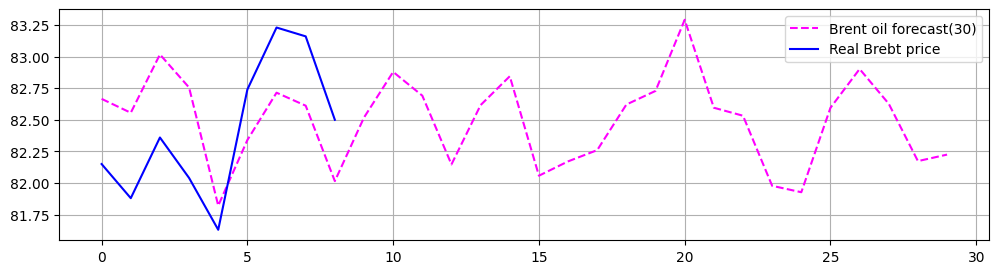

In [371]:
plt.plot(forecastBrent,ls='--',c='magenta', label= 'Brent oil forecast(30)')
plt.plot([82.15, 81.88, 82.36, 82.04, 81.63, 82.74, 83.23, 83.16, 82.5], label='Real Brebt price',c='b')
plt.legend()
plt.grid()

In [74]:
fig = px.line(x= np.arange(0,30), y=forecastBrent, markers=True, line_shape='linear', width=800, height=300 ,
                    labels={'y': 'Brent Crude Price ($)', 'x': 'Horizon'})

fig.show()

In [ ]:
import plotly.express as px

In [70]:
import plotly.express as px
import pandas as pd

# Sample data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 20, 15, 25, 30]
})

# Create a line plot with Plotly Express
fig = px.line(data, x='x', y='y', markers=True, line_shape='linear', width=800, height=300 ,
             labels={'y': 'Brent Crude Price ($)', 'x': 'Horizon'})

# Display the Plotly figure with hover information
st.plotly_chart(fig)
fig.show()

In [328]:
forecastGARCH.variance.values[-1, :]

array([6.43657725, 6.32660196, 6.78806816, 6.52628186, 5.59186364,
       6.1110038 , 6.48544361, 6.38261165, 5.78598033, 6.28902962,
       6.64985743, 6.4619811 , 5.91809735, 6.38738258, 6.61547901,
       5.82870801, 5.9420422 , 6.03116668, 6.39181444, 6.49953262,
       7.0622625 , 6.36639572, 6.30312105, 5.74874768, 5.69805356,
       6.3659574 , 6.67285673, 6.39774015, 5.94421718, 5.99568999])

In [346]:
from sklearn.preprocessing import MinMaxScaler
scalerMM =  MinMaxScaler()
varGARCH = scalerMM.fit_transform(forecastGARCH.variance.values[-1, :].reshape(-1, 1))
varGARCH

array([[0.57447923],
       [0.4996864 ],
       [0.81352384],
       [0.63548622],
       [0.        ],
       [0.35306077],
       [0.60771264],
       [0.5377779 ],
       [0.13201635],
       [0.47413392],
       [0.71952843],
       [0.59175607],
       [0.22186749],
       [0.54102255],
       [0.6961481 ],
       [0.16107491],
       [0.23815209],
       [0.29876454],
       [0.5440366 ],
       [0.6172944 ],
       [1.        ],
       [0.52674965],
       [0.48371733],
       [0.10669488],
       [0.07221844],
       [0.52645155],
       [0.73516997],
       [0.5480666 ],
       [0.23963126],
       [0.27463728]])

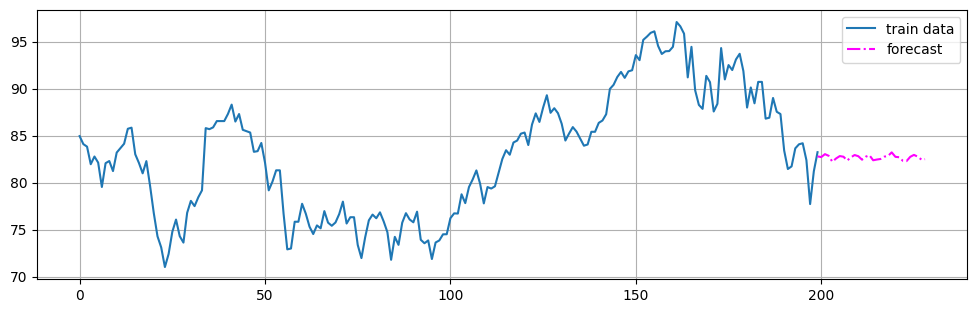

In [347]:
'''combined forecast'''
forecastBrentS = forecastARIMA.mean() + varGARCH

'''set up forecast dataframe'''
forecastIndex = pd.date_range(start='2023-11-20', periods=30, freq='D')
forecastDf = pd.DataFrame(forecastBrentS, index=forecastIndex, columns=['Forecast'])
horizon=30
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(df['price'][-200:].values,label='train data')
plt.plot(range(199,199+horizon),forecastBrentS,label='forecast',c='magenta',ls='-.')
plt.legend()

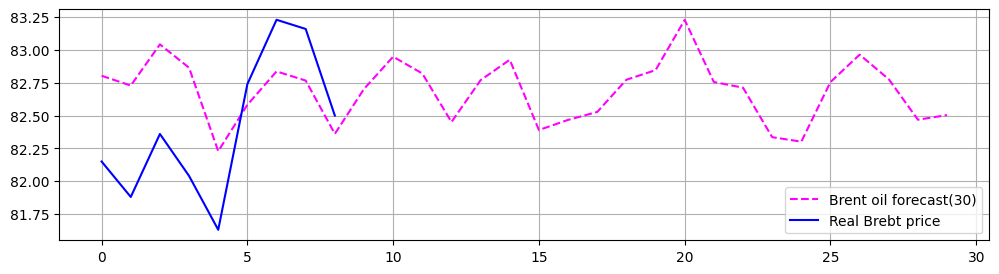

In [348]:
plt.plot(forecastBrentS,ls='--',c='magenta', label= 'Brent oil forecast(30)')
plt.plot([82.15, 81.88, 82.36, 82.04, 81.63, 82.74, 83.23, 83.16, 82.5], label='Real Brebt price',c='b')
plt.legend()
plt.grid()

In [217]:
forecastBrent

array([88.66749387, 88.66887045, 88.67024703, 88.67162361, 88.67300019,
       88.67437678, 88.67575336, 88.67712994, 88.67850653, 88.67988311,
       88.68125969, 88.68263628, 88.68401286, 88.68538945, 88.68676604,
       88.68814263, 88.68951922, 88.69089581, 88.6922724 , 88.69364899,
       88.69502558, 88.69640217, 88.69777876, 88.69915535, 88.70053194,
       88.70190853, 88.70328512, 88.70466171, 88.7060383 , 88.70741489])

In [54]:
pred_ARIMA

2022-01-21    89.806499
2022-01-24    89.878041
2022-01-25    89.975689
2022-01-26    90.095303
2022-01-27    90.221018
                ...    
2025-09-10    90.777285
2025-09-11    90.777285
2025-09-12    90.777285
2025-09-15    90.777285
2025-09-16    90.777285
Freq: B, Name: predicted_mean, Length: 953, dtype: float64

==============================================================================================================

### ARIMA-EGARCH

In [338]:
modelEGARCH = arch.arch_model(residArima,mean='Zero', vol='EGARCH', p=50, q=30)

In [339]:
resultEGarch = modelEGARCH.fit()
'''GARCH forecast'''
forecastEGARCH = resultGarch.forecast(horizon=30)

Iteration:      1,   Func. Count:     83,   Neg. LLF: 119461028.85322052
Iteration:      2,   Func. Count:    175,   Neg. LLF: 4327284359.68368
Iteration:      3,   Func. Count:    261,   Neg. LLF: 2714306084.9640546
Iteration:      4,   Func. Count:    347,   Neg. LLF: 2617569136.2887564
Iteration:      5,   Func. Count:    433,   Neg. LLF: 2698650998.4579077
Iteration:      6,   Func. Count:    518,   Neg. LLF: 2592197532.800856
Iteration:      7,   Func. Count:    603,   Neg. LLF: 2117335236.194456
Iteration:      8,   Func. Count:    688,   Neg. LLF: 2376589599.7829404
Iteration:      9,   Func. Count:    774,   Neg. LLF: 2115618321.9565015
Iteration:     10,   Func. Count:    859,   Neg. LLF: 2142107880.9629729
Iteration:     11,   Func. Count:    944,   Neg. LLF: 2303104946.106905
Iteration:     12,   Func. Count: 1.03e+03,   Neg. LLF: 2088669598.6676555
Iteration:     13,   Func. Count: 1.11e+03,   Neg. LLF: 2171547429.4246035
Iteration:     14,   Func. Count: 1.2e+03,   Neg. LL

C:\Users\rakes\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


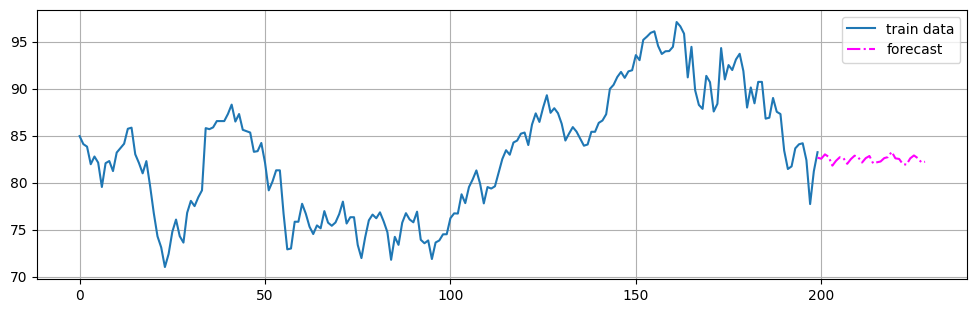

In [340]:
'''combined forecast'''
forecastBrentE = forecastARIMA.mean() + forecastEGARCH.variance.values[-1, :]-6

'''set up forecast dataframe'''
forecastIndex = pd.date_range(start='2023-11-20', periods=30, freq='D')
forecastDfE = pd.DataFrame(forecastBrent, index=forecastIndex, columns=['Forecast'])
horizon=30
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(df['price'][-200:].values,label='train data')
plt.plot(range(199,199+horizon),forecastBrentE,label='forecast',c='magenta',ls='-.')
plt.legend()

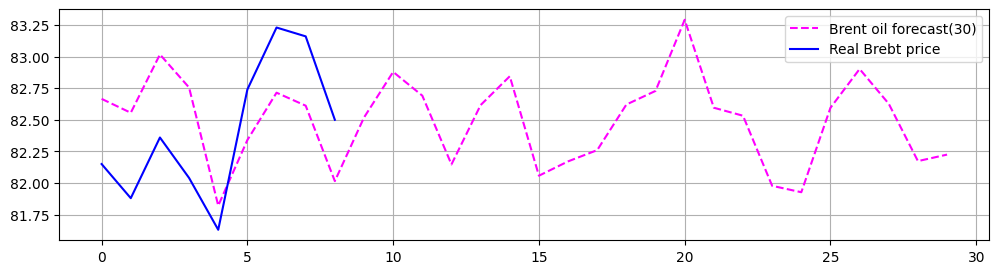

In [341]:
plt.plot(forecastBrentE,ls='--',c='magenta', label= 'Brent oil forecast(30)')
plt.plot([82.15, 81.88, 82.36, 82.04, 81.63, 82.74, 83.23, 83.16, 82.5], label='Real Brebt price',c='b')
plt.legend()
plt.grid()

==============================================================================================================

### SARIMA

In [332]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12),
                      time_varying_regression= True,
                      mle_regression= False).fit()

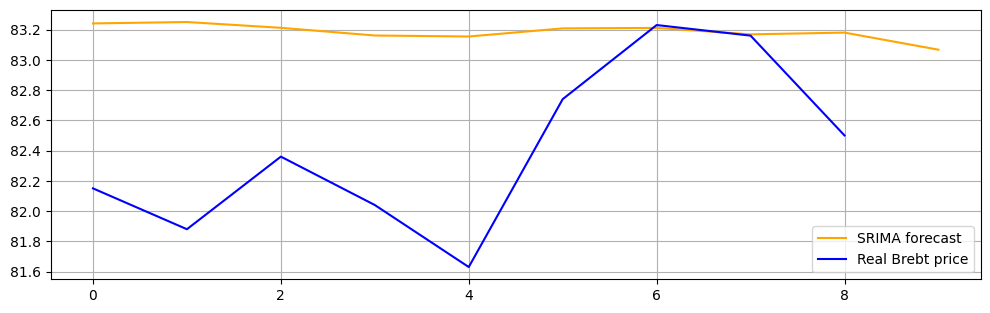

In [362]:
pred_SARIMA= model_SARIMA.forecast(10)
plt.figure(figsize=(12,3.5))
plt.grid()
# plt.plot(dfTrain,label='train data')
# plt.plot((dfTest1['price']),label='test data', c='g',ls='-.')
plt.plot(pred_SARIMA.values,c='orange',label='SRIMA forecast')
plt.plot([82.15, 81.88, 82.36, 82.04, 81.63, 82.74, 83.23, 83.16, 82.5], label='Real Brebt price',c='b')
plt.legend()

In [363]:
residSARIMA = model_SARIMA.resid

In [365]:
modelSGARCH = arch.arch_model(residSARIMA,mean='Zero', vol='GARCH', p=50, q=30)
resultSGarch = modelSGARCH.fit()
'''GARCH forecast'''
forecastSGARCH = resultSGarch.forecast(horizon=30)

Iteration:      1,   Func. Count:     83,   Neg. LLF: 151641.49708341795
Iteration:      2,   Func. Count:    166,   Neg. LLF: 16273.931150966166
Iteration:      3,   Func. Count:    249,   Neg. LLF: 785227.6278828927
Iteration:      4,   Func. Count:    332,   Neg. LLF: 792605.4249998931
Iteration:      5,   Func. Count:    415,   Neg. LLF: 2699049.506658083
Iteration:      6,   Func. Count:    498,   Neg. LLF: 884024.0736693678
Iteration:      7,   Func. Count:    581,   Neg. LLF: 642068.0847777548
Iteration:      8,   Func. Count:    664,   Neg. LLF: 127551.44732218467
Iteration:      9,   Func. Count:    748,   Neg. LLF: 66694.62665942342
Iteration:     10,   Func. Count:    831,   Neg. LLF: 31787.96204289904
Iteration:     11,   Func. Count:    914,   Neg. LLF: 13381.815206161877
Iteration:     12,   Func. Count:    999,   Neg. LLF: 25824.143109965607
Iteration:     13,   Func. Count: 1.08e+03,   Neg. LLF: 16766.586763977255
Iteration:     14,   Func. Count: 1.16e+03,   Neg. LLF: 

C:\Users\rakes\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [368]:
from sklearn.preprocessing import MinMaxScaler
scalerMM1 =  MinMaxScaler()
varSGARCH = scalerMM1.fit_transform(forecastSGARCH.variance.values[-1, :].reshape(-1, 1))
varSGARCH

array([[0.44794774],
       [0.35615311],
       [0.87404299],
       [0.42697391],
       [0.        ],
       [0.30319304],
       [0.57393521],
       [0.52318102],
       [0.18158755],
       [0.5507906 ],
       [0.63668917],
       [0.52850699],
       [0.20039093],
       [0.50073277],
       [0.70978086],
       [0.13430345],
       [0.29764382],
       [0.18736617],
       [0.43254633],
       [0.55449186],
       [1.        ],
       [0.46059379],
       [0.4059588 ],
       [0.12374722],
       [0.02566891],
       [0.46134157],
       [0.71743271],
       [0.54359773],
       [0.22403261],
       [0.18821573]])

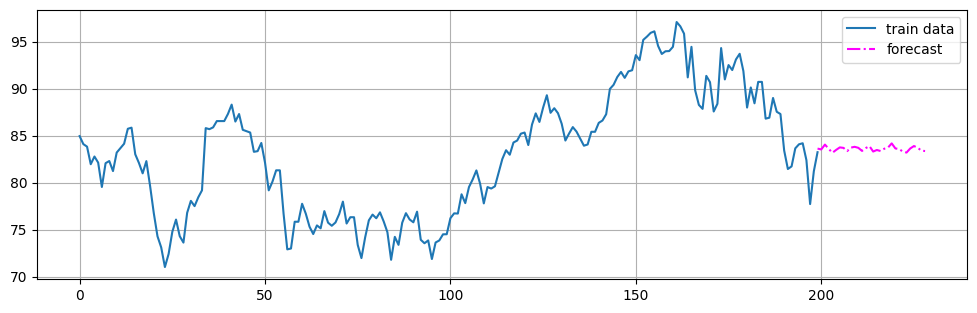

In [369]:
'''combined forecast'''
forecastBrentS = pred_SARIMA.mean() + varSGARCH

'''set up forecast dataframe'''
forecastIndex= pd.date_range(start='2023-11-20', periods=30, freq='D')
forecastDfS = pd.DataFrame(forecastBrentS, index=forecastIndex, columns=['Forecast'])
horizon=30
plt.figure(figsize=(12,3.5))
plt.grid()
plt.plot(df['price'][-200:].values,label='train data')
plt.plot(range(199,199+horizon),forecastBrentS,label='forecast',c='magenta',ls='-.')
plt.legend()

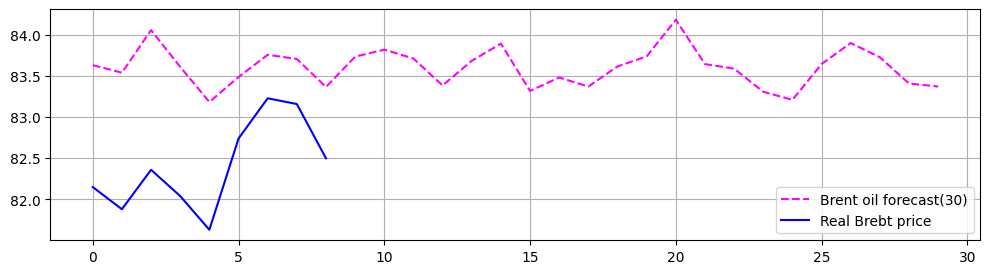

In [370]:
plt.plot(forecastBrentS,ls='--',c='magenta', label= 'Brent oil forecast(30)')
plt.plot([82.15, 81.88, 82.36, 82.04, 81.63, 82.74, 83.23, 83.16, 82.5], label='Real Brebt price',c='b')
plt.legend()
plt.grid()

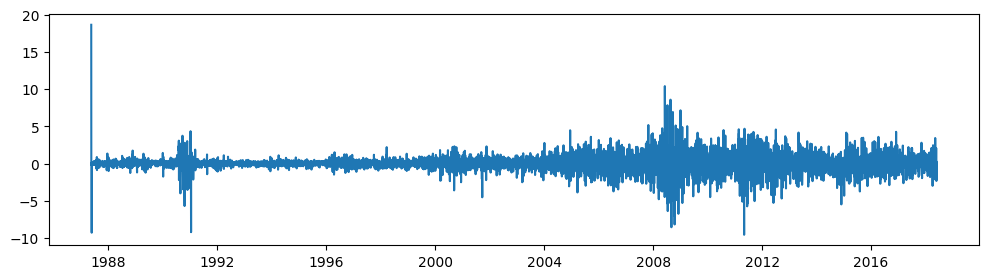

In [307]:
plt.plot(model_SARIMA.resid,label=' SARIMA residuals')

In [ ]:
modelGARCH = arch.arch_model(residArima,mean='Zero', vol='Garch', p=50, q=30)

### Kalman Filter Estimation

In [67]:
!pip install pykalman

     -------------------------------------- 228.9/228.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48450 sha256=dc515e16f6368536db478080f8c641b1c88475e67f5c788c22da2935ceb6fa80
  Stored in directory: c:\users\rakes\appdata\local\pip\cache\wheels\05\c8\d9\6f343bfea436aa40ad725f7815e3e735b5b42518fded200cd2
Successfully built pykalman


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter


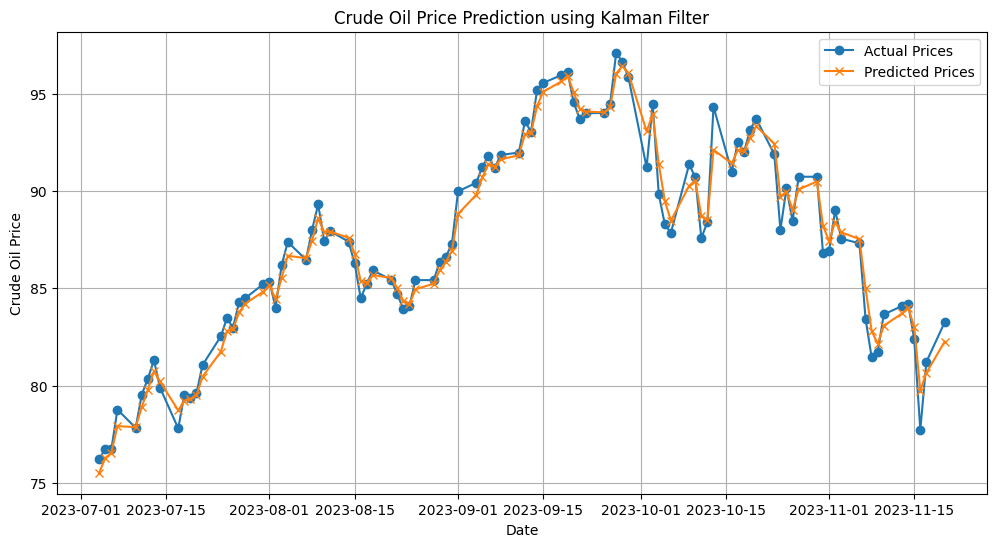

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], crude_oil_prices[-100:], label='Actual Prices', marker='o')
plt.plot(df.index[-100:], state_means[-100:], label='Predicted Prices', marker='x')
plt.title('Crude Oil Price Prediction using Kalman Filter')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.legend()
plt.grid()
plt.show()

In [126]:
steps_to_predict = 1
last_date = data.index[-1]

# Predict future values iteratively
predicted_means = []

state_means, state_covariances = kf.filter_update(state_means[-1], state_covariances[-1], observation=None)
predicted_means.append(state_means[-1])

# # Generate future dates
# future_dates = pd.date_range(start=last_date, periods=steps_to_predict, freq='D')

# # Plot the results
# plt.figure(figsize=(12, 6))
# # plt.plot(data.index, crude_oil_prices, label='Actual Prices', marker='o')
# plt.plot(future_dates, predicted_means, label='Future Predictions', marker='s')

# plt.title('Crude Oil Price Prediction using Kalman Filter')
# plt.xlabel('Date')
# plt.ylabel('Crude Oil Price')
# plt.legend()
# plt.show()

NameError: name 'data' is not defined

In [104]:
predicted_means

[82.25996780062852]

In [106]:
df[-1:]

,price
date,
2023-11-20,83.25


In [107]:
state_means, state_covariances

(array([82.2599678]), array([[1.61803399]]))

In [108]:
steps_to_predict = 1
last_date = data.index[-1]

# Predict future values iteratively
predicted_means = []

state_means, state_covariances = kf.filter_update(82.2599678, 1.61803399, observation=None)
predicted_means.append(state_means[-1])

[array([82.2599678])]

In [122]:
import numpy as np

def state_transition_matrix(series, window_size):

    n = len(series)
    F = np.zeros((window_size, window_size))
    for i in range(n - window_size + 1):
        F += np.outer(series[i:i+window_size], series[i+1:i+window_size+1])
    F /= (n - window_size + 1)
    return F

F = state_transition_matrix(df['price'], 2)
print(F)


[[3536.72597311 3536.28195246]
 [3537.81395959 3537.41764999]]


C:\Users\rakes\AppData\Local\Temp\ipykernel_26512\3818992750.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  initial_state_mean = np.array([crude_oil_prices[0], 0])  # Assuming initial rate is 0


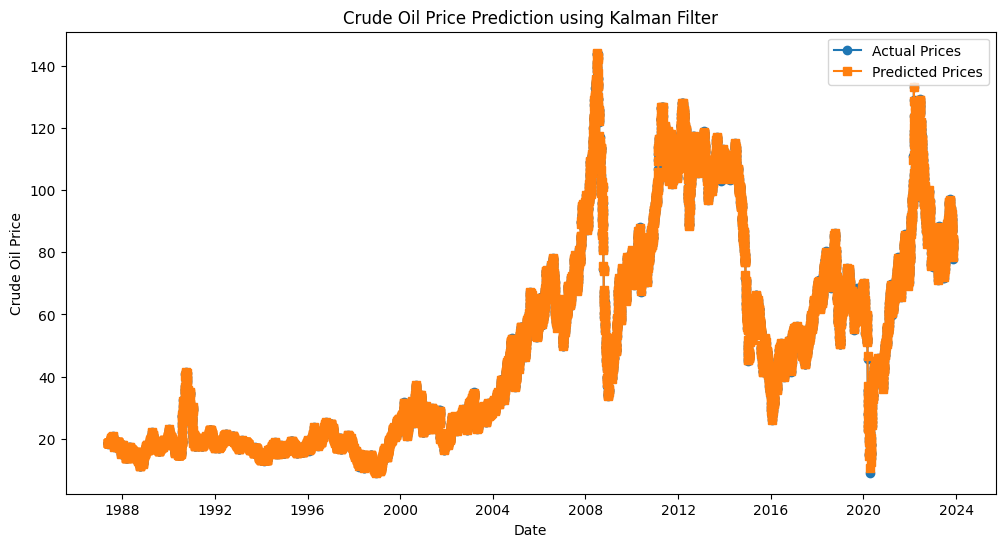

In [128]:

crude_oil_prices = df['price'].values
crude_oil_prices = crude_oil_prices.reshape(-1, 1)

A = np.array([[1, 1], [0, 1]])

initial_state_mean = np.array([crude_oil_prices[0], 0])  # Assuming initial rate is 0
initial_state_covariance = np.eye(2) 

kf = KalmanFilter(initial_state_mean=initial_state_mean,
                  initial_state_covariance=initial_state_covariance,
                  transition_matrices=A)

state_means, state_covariances = kf.filter(crude_oil_prices)

plt.figure(figsize=(12, 6))
plt.plot(df.index, crude_oil_prices, label='Actual Prices', marker='o')
plt.plot(df.index, state_means[:, 0], label='Predicted Prices', marker='s')

plt.title('Crude Oil Price Prediction using Kalman Filter')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.legend()
plt.show()



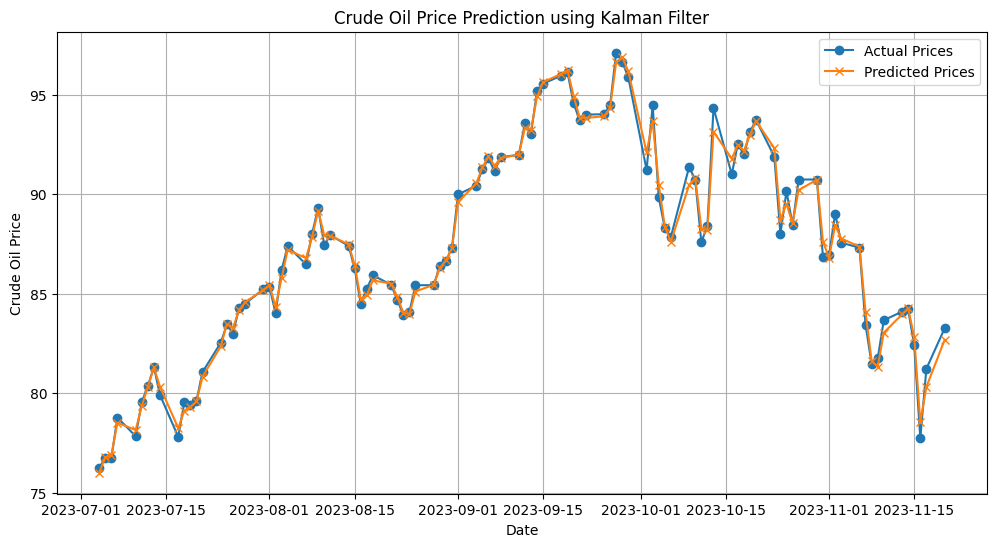

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], crude_oil_prices[-100:], label='Actual Prices', marker='o')
plt.plot(df.index[-100:], state_means[:,0][-100:], label='Predicted Prices', marker='x')
plt.title('Crude Oil Price Prediction using Kalman Filter')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.legend()
plt.grid()
plt.show()

In [146]:
state_means[:-10]

array([[ 1.86300000e+01,  0.00000000e+00],
       [ 1.85014286e+01, -5.14285714e-02],
       [ 1.85300000e+01, -1.14285714e-02],
       ...,
       [ 8.84331628e+01,  3.16677097e-01],
       [ 8.77637558e+01, -1.89754264e-01],
       [ 8.73570328e+01, -3.01184670e-01]])

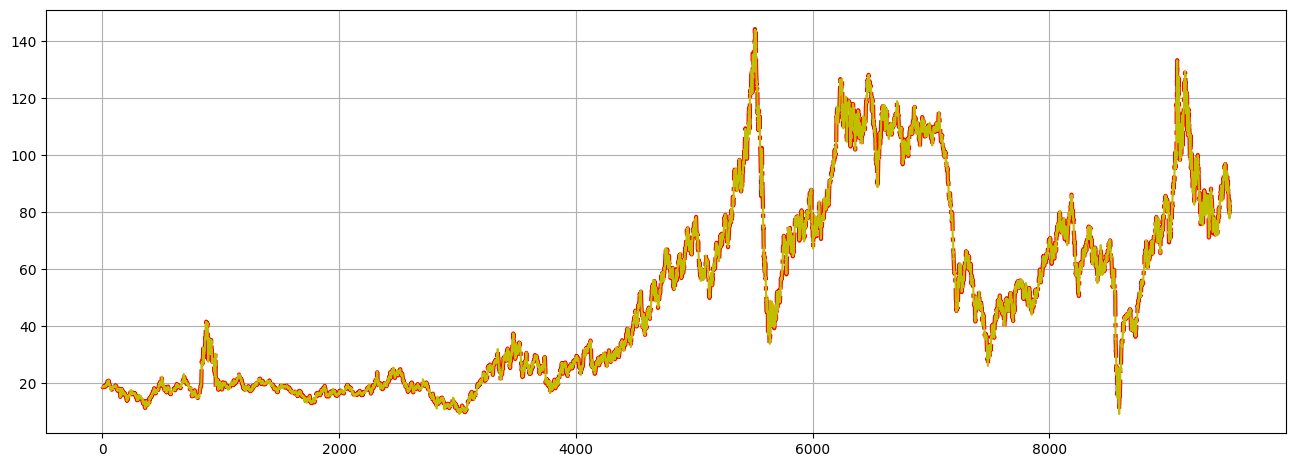

In [193]:
plt.subplots(figsize=(16,5.5))
plt.plot(state_means[:,0],ls='-.',color ='r',lw=3)
plt.grid()
plt.plot(dfT['price'],color ='y')

In [161]:
state_means, state_covariances = kf.filter_update(state_means[-1], state_covariances[-1], observation=None)
state_means

array([[1.07775535, 1.07775535],
       [0.        , 1.07775535]])

In [159]:
predicted_means.append(state_means)

In [160]:
predicted_means

[array([[1.07775535, 1.07775535],
        [0.        , 1.07775535]]),
 array([1.07775535, 1.07775535]),
 array([[1.07775535, 1.07775535],
        [0.        , 1.07775535]]),
 array([1.07775535, 1.07775535]),
 array([[1.07775535, 1.07775535],
        [0.        , 1.07775535]]),
 array([1.07775535, 1.07775535]),
 array([[1.07775535, 1.07775535],
        [0.        , 1.07775535]]),
 array([1.07775535, 1.07775535]),
 array([[1.07775535, 1.07775535],
        [0.        , 1.07775535]]),
 array([1.07775535, 1.07775535]),
 1.0777553487930405,
 array([1.07775535, 1.07775535])]

In [166]:
state_means, state_covariances = kf.filter(crude_oil_prices[-2:])
state_means

array([[49.925     ,  0.        ],
       [73.72857143,  9.52142857]])

In [165]:
crude_oil_prices[-2:]

array([[81.22],
       [83.25]])

In [164]:
state_covariances

array([[[0.5, 0. ],
        [0. , 1. ]]])

## Transformations

### Box-Cox

In [47]:
from scipy.stats import boxcox
transformed_data, lambda_value = boxcox(df['price'])

In [61]:
dfT=pd.read_csv('brentoil.csv')
dfT.tail()

,date,price
9519,2023-11-14,84.20
9520,2023-11-15,82.40
9521,2023-11-16,77.73
9522,2023-11-17,81.22
9523,2023-11-20,83.25


In [63]:
optimal_lambda

-2.0

In [99]:
import numpy as np
from scipy.stats import boxcox
from scipy.special import inv_boxcox

tsBoxcox = boxcox(dfT.price,1.2)


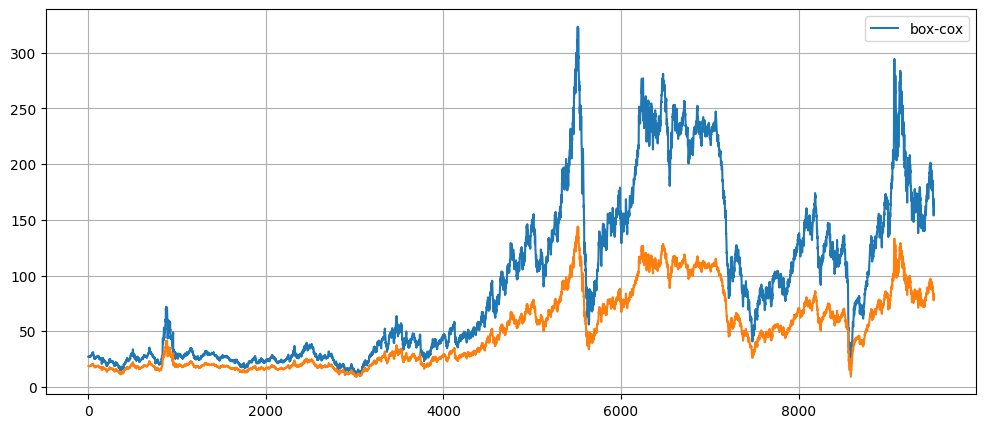

In [100]:
plt.subplots(figsize=(12,5))
plt.plot(tsBoxcox,label = 'box-cox')
plt.plot(dfT['price'])
plt.grid()
plt.legend()

In [234]:
#check for stationarity
adf_test = adfuller(tsBoxcox)
print(f'p-value: {adf_test[1]}')

p-value: 0.17450220296248303


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


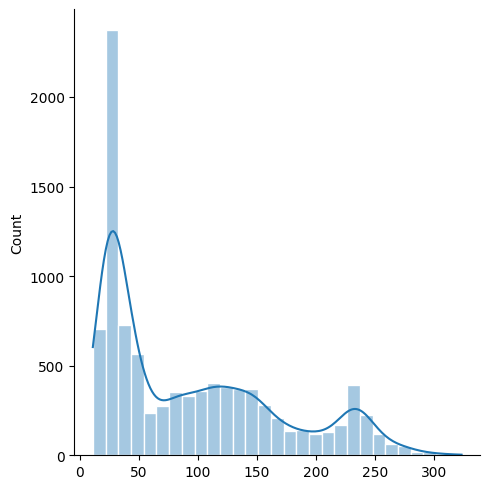

In [111]:
sns.displot(tsBoxcox,kde=True,alpha=.4,edgecolor='white')

### log transformation

In [107]:
tsLog = np.log(dfT['price'])

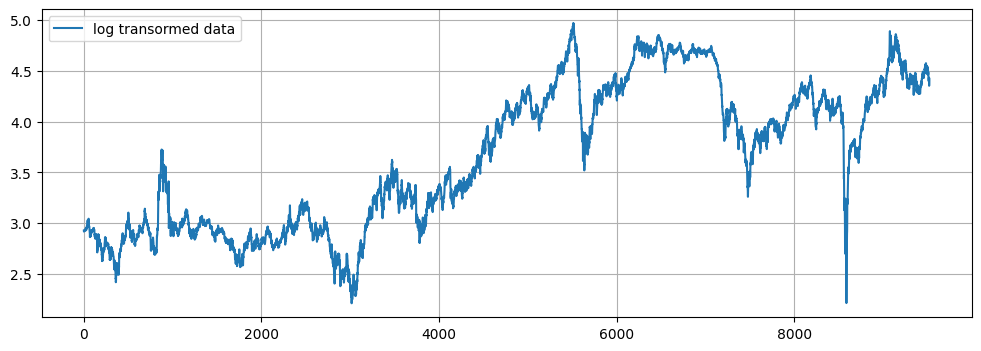

In [198]:
plt.subplots(figsize=(12,4))
plt.plot(tsLog,label = 'log transormed data')
# plt.plot(dfT['price'])
plt.grid()
plt.legend()

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


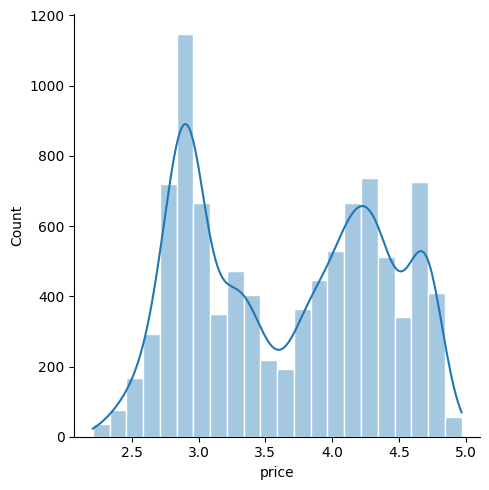

In [112]:
sns.displot(tsLog,kde=True,edgecolor = 'white', alpha=.4)

In [235]:
#check for stationarity
adf_test = adfuller(tsLog)
print(f'p-value: {adf_test[1]}')

p-value: 0.35976140530682416


### Winsorization: 

In [79]:
import pandas as pd
import numpy as np

def winsorize(data, percentile):

    lower_threshold = data.quantile(percentile / 100)
    upper_threshold = data.quantile(1-percentile/ 100)
    winsorized_data = data.copy()
    winsorized_data[data < lower_threshold] = lower_threshold
    winsorized_data[data > upper_threshold] = upper_threshold

    return winsorized_data


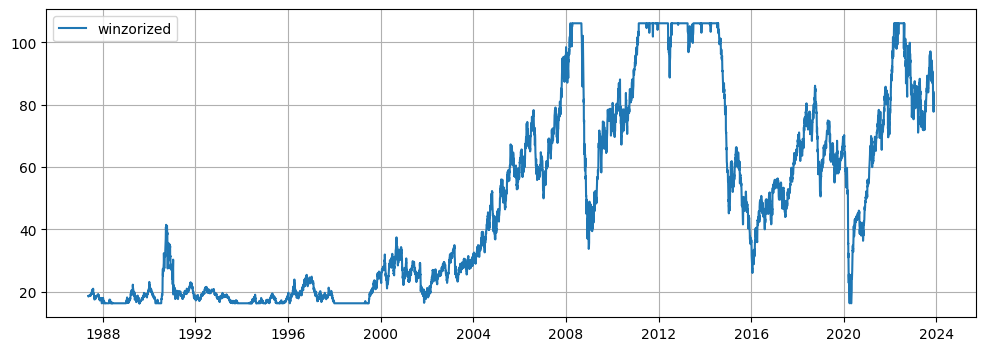

In [153]:
tfWinz=winsorize(df['price'],90)
plt.subplots(figsize=(12,4))
plt.plot(tfWinz,label = 'winzorized')
# plt.plot(dfT['price'])
plt.grid()
plt.legend()

In [159]:
tfWinz.values

array([18.63, 18.45, 18.55, ..., 77.73, 81.22, 83.25])

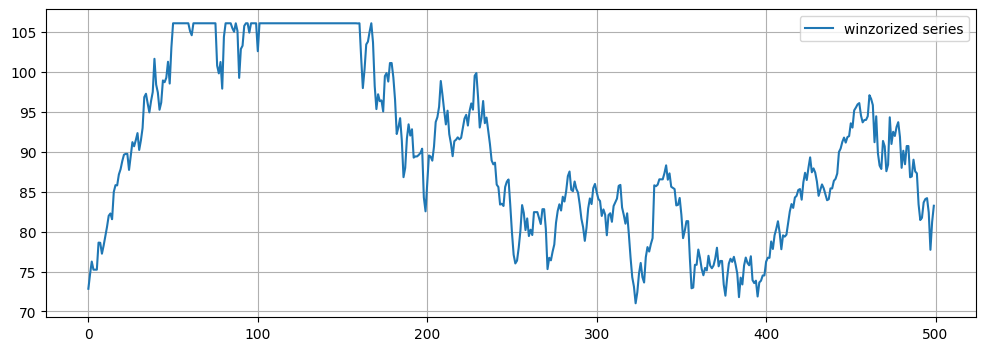

In [241]:
plt.subplots(figsize=(12,4))
plt.plot(tfWinz.values[-500:],label = 'winzorized series')
# plt.plot(dfT['price'])
plt.grid()
plt.legend()

### Thresholding

In [238]:
import pandas as pd
threshold = 85

thresholded_series = dfT.price.copy()
thresholded_series[thresholded_series > 90] = 120
thresholded_series[thresholded_series < 10] = 15


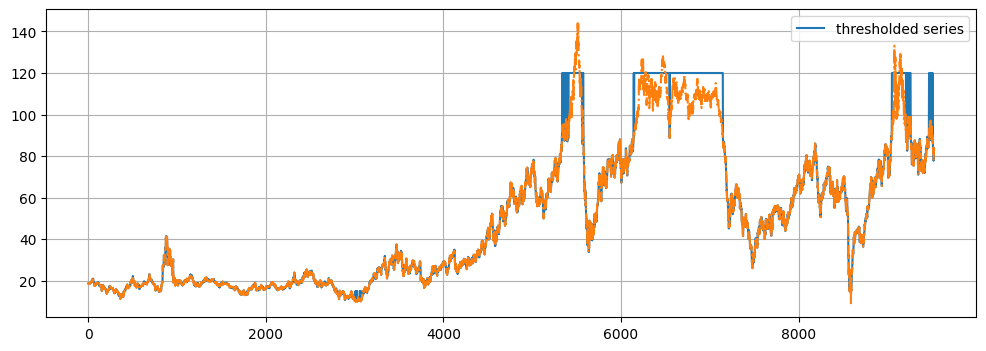

In [240]:
plt.subplots(figsize=(12,4))
plt.plot(thresholded_series,label = 'thresholded series')
plt.plot(dfT['price'],ls='-.')
plt.grid()
plt.legend()